**<font size=48>Machine Learning</font>**<br>

Lab09 - Gradient Descent Part A - Gradient Descent with Regularization for Linear Regression

Objectives:
- Learn Gradient Descent to Solve Linear Regression

This lab is by YP Wong [<yp@ypwong.net>](mailto:yp@ypwong.net).


# <font color='lightblue'>Mount Google Drive</font>

In [ ]:
# # This is needed if you need to read data from your Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Change the path to where you run the Jupyter Notebook from.
# # notebook_path = r"/content/drive/MyDrive/Colab Notebooks"
# notebook_path = r"/content/drive/MyDrive/Classroom/_ML2324T1/YP_Editable_ML_Labs/Lab09_GradientDescent"
# import os
# os.chdir(notebook_path)
# !pwd

# Gradient Descent with Regularization for Linear Regression

## Linear Regression Model

Given the predicted variable $\mathbf{\hat{y}}$,
the dependant variable $\mathbf{\vec{y}}$,
augmented data matrix $\mathbf{X}$,
column of index $j$ of $\mathbf{X}$ as vector $\mathbf{\vec{x}_j}$,
and model parameter $\mathbf{\vec{\theta}}$:
$$
\mathbf{\hat{y}} =
  \begin{bmatrix}
    \hat{y}^{(1)} \\
    \hat{y}^{(2)} \\
    \vdots \\
    \hat{y}^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{\vec{y}} =
  \begin{bmatrix}
    y^{(1)} \\
    y^{(2)} \\
    \vdots \\
    y^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{X} =   
  \begin{bmatrix}
    1 & x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{n}^{(1)} \\
    1 & x_{1}^{(2)} & x_{2}^{(2)} & \cdots & x_{n}^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{1}^{(m)} & x_{2}^{(m)} & \cdots & x_{n}^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{\vec{x}_j} =
  \begin{bmatrix}
    x_{j}^{(1)} \\
    x_{j}^{(2)} \\
    \vdots \\
    x_{j}^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{\vec{\theta}}  
  \begin{bmatrix}
    \theta_{0} \\
    \theta_{1} \\
    \vdots \\
    \theta_{n}
  \end{bmatrix}
$$
<br>
The predicted values can be computed as:
$$
\hat{y}^{(1)} = \theta_0 + \theta_1 x_{1}^{(1)} + \theta_2 x_{2}^{(1)} + \dots + \theta_n x_{n}^{(1)} \\
\hat{y}^{(2)} = \theta_0 + \theta_1 x_{1}^{(2)} + \theta_2 x_{2}^{(2)} + \dots + \theta_n x_{n}^{(2)} \\
\vdots \\
\hat{y}^{(m)} = \theta_0 + \theta_1 x_{1}^{(m)} + \theta_2 x_{2}^{(m)} + \dots + \theta_n x_{n}^{(m)}
$$
<br>

$$
  \begin{bmatrix}
    \hat{y}^{(1)} \\
    \hat{y}^{(2)} \\
    \vdots \\
    \hat{y}^{(m)}
  \end{bmatrix} =
  \begin{bmatrix}
    1 & x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{n}^{(1)} \\
    1 & x_{1}^{(2)} & x_{2}^{(2)} & \cdots & x_{n}^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{1}^{(m)} & x_{2}^{(m)} & \cdots & x_{n}^{(m)}
  \end{bmatrix} \
  \begin{bmatrix}
    \theta_{0} \\
    \theta_{1} \\
    \vdots \\
    \theta_{n}
  \end{bmatrix}
$$
<br>

$$ \mathbf{\hat{y}} = \mathbf{X} \mathbf{\vec{\theta}} $$


## Cost Function with L2 Regularization

The goal of the **cost function** (also known as the **loss function** or **objective function**) is to quantify how well a model's predictions match the actual target values.

The **cost function** serves as a measure of the error or mismatch between the predicted output and the true output.

**Gradient descent** is an **iterative optimization algorithm** used to minimize the **cost function**. The primary goal is to find the set of **model parameters** (weights and biases) that result in the lowest possible value of the **cost function**.

In **linear regression**, the common **cost function** as defined below.  

$$
J(\theta_1, \theta_2, \dots, \theta_n)
= J(\mathbf{\vec{\theta}})  
= \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$$

The first term is the **mean squared error (MSE)** which is the error between the predicted values and the actual values that we wish our algorithm minimizes.

The second term is the **regularization term** which is added to with the goal of preventing **overfitting** and improving the generalization performance of the model, The **regularization term** discourages overly complex models by penalizing large values of the model parameters, thus leads to more robust models that generalize better to new, unseen data.

Here, $\lambda$ is the **regularization parameter**, which controls the strength of the regularization. The larger the $\lambda$, the stronger the regularization effect.

The terms are divided by $m$ to average over the $m$ data points.

The terms are also divided by $2$ to simplify the derivative used in gradient descent later as $\frac{1}{2} . \frac{\partial}{\partial x} \left( f(x)^2 \right) = f(x)$.

The regularization shown above is called **L2 Regularization (Ridge)**, it
adds the sum of the squared values of the model parameters to the cost function. Another common type is the **L1 Regularization (Lasso)** which adds the sum of the absolute values of the model parameters to the cost function, in which case the term would be $\frac{\lambda}{2m} \sum_{j=1}^{n} | \theta_j | $.

Take note that commonly, the model parameter $\theta_0$, which is the intercept, is not used in the regularization term.

In Scikit-learn's logistic regression implementation, the parameter $C$ is the inverse of the regularization strength, and it is used in a way that is somewhat inversely related (i.e. $C = \frac{1}{\lambda}$) to $\lambda$ commonly used in the context of regularization strength in machine learning literature.

## Gradient Function with L2 Regularization

Since
$$
\frac{\partial \hat{y}^{(i)} } {\partial \theta_j}
= \frac{\partial} {\partial \theta_j} \left(
  \begin{bmatrix}
    1 & x_{1}^{(i)} & x_{2}^{(i)} & \cdots & x_{n}^{(i)}
  \end{bmatrix} \
  \begin{bmatrix}
    \theta_{0} \\
    \theta_{1} \\
    \vdots \\
    \theta_{n}
  \end{bmatrix} \right)
$$
$$
\frac{\partial \hat{y}^{(i)} } {\partial \theta_j}
= \frac{\partial} {\partial \theta_j} \left(
    \theta_{0} + x_{1}^{(i)} \theta_{1}
               + x_{2}^{(i)} \theta_{2} + \dots
               + x_{j}^{(i)} \theta_{j} + \dots
               + x_{n}^{(i)} \theta_{n}
\right)
$$
$$
\frac{\partial \hat{y}^{(i)} } {\partial \theta_j}
= x_{j}^{(i)}
$$
<br>

the **graadient** of the cost function $J(\mathbf{\vec{\theta}})$ with respect to $\theta_j$ is given by:
<br>

$$
\frac{\partial J(\theta_1, \theta_2, \dots, \theta_n) }{\partial \theta_j}
= \frac{\partial J(\mathbf{\vec{\theta}})}{\partial \theta_j}
= \frac{1}{m} \sum_{i=1}^{m} \left[ \frac{\partial (\hat{y}^{(i)} - y^{(i)}) } {\partial \theta_j} \right] + \frac{\lambda}{m} \theta_j
$$

$$
\frac{\partial J(\mathbf{\vec{\theta}})}{\partial \theta_j}
= \frac{1}{m} \sum_{i=1}^{m} \left[ \left( \hat{y}^{(i)} - y^{(i)}\right) \frac{\partial \hat{y}^{(i)} } {\partial \theta_j} \right] + \frac{\lambda}{m} \theta_j
$$

$$
\frac{\partial J(\mathbf{\vec{\theta}})}{\partial \theta_j}
= \frac{1}{m} \sum_{i=1}^{m} \left[ \left( \hat{y}^{(i)} - y^{(i)}\right) x_j^{(i)} \right] + \frac{\lambda}{m} \theta_j
$$

$$
\frac{\partial J(\mathbf{\vec{\theta}})}{\partial \theta_j}
= \frac{1}{m}  \left( \mathbf{\hat{y}} - \mathbf{\vec{y}} \right) \bullet \mathbf{\vec{x}_j} + \frac{\lambda}{m} \theta_j
$$

$$
\frac{\partial J(\mathbf{\vec{\theta}})}{\partial \theta_j}
= \frac{1}{m}  \mathbf{\vec{x}_j}^T \left( \mathbf{\hat{y}} - \mathbf{\vec{y}} \right)  + \frac{\lambda}{m} \theta_j
$$

$$
  \begin{bmatrix}
    \frac{\partial J(\mathbf{\vec{\theta}})}{\partial \theta_0} \\
    \frac{\partial J(\mathbf{\vec{\theta}})}{\partial \theta_1} \\
    \frac{\partial J(\mathbf{\vec{\theta}})}{\partial \theta_2} \\
    \vdots \\
    \frac{\partial J(\mathbf{\vec{\theta}})}{\partial \theta_n}
  \end{bmatrix} =
  \frac{1}{m}
  \begin{bmatrix}
                      1   \\
     \mathbf{\vec{x}_1}^T \\
     \mathbf{\vec{x}_2}^T \\
    \vdots \\
     \mathbf{\vec{x}_m}^T  
  \end{bmatrix}
  \left( \mathbf{\hat{y}} - \mathbf{\vec{y}} \right)
  +
  \frac{\lambda}{m}
  \begin{bmatrix}
    0 \\
    \theta_{1} \\
    \theta_{2} \\
    \vdots \\
    \theta_{n}
  \end{bmatrix}
$$

$$
  \frac{\partial J(\mathbf{\vec{\theta}})}{\partial \mathbf{\vec{\theta}} } =
  J'(\mathbf{\vec{\theta}}) =
  \frac{1}{m}
  \mathbf{X}^T
  \left( \mathbf{\hat{y}} - \mathbf{\vec{y}} \right)
  +
  \frac{\lambda}{m}
  \begin{bmatrix}
    0 \\
    \theta_{1} \\
    \theta_{2} \\
    \vdots \\
    \theta_{n}
  \end{bmatrix}
$$
<br>

The **gradient** is a vector that points in the direction of the **steepest ascent** of the cost function surface at a particular point in the model parameter space. Thus, the goal of the optimization to minimize the cost at that point is to update the point in the opposite direction of the gradient vector, i.e. in the direction of **steepest descent**, thus the name of the optimization algorithm is called **gradient descent**

## Gradient Descent Steps

1. **Initialize Parameters:**
   $$ \theta_j \leftarrow 0 \ \ \ \text{for } j = 0, 1, \ldots, n $$

2. **Repeat Until Convergence:**
   - **Compute Predictions:**
      $$ \mathbf{\hat{y}} = \mathbf{X} \mathbf{\vec{\theta}} $$
   - **Compute Cost:**
      $$
      J(\mathbf{\vec{\theta}})  
      = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 +
      \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
      $$
   - **Compute Gradient:**
$$ J'(\mathbf{\vec{\theta}}) =
\frac{1}{m} \mathbf{X}^T
\left( \mathbf{\hat{y}} - \mathbf{\vec{y}} \right) +
\frac{\lambda}{m}
\begin{bmatrix}
0 \\
\theta_{1} \\
\theta_{2} \\
\vdots \\
\theta_{n}
\end{bmatrix}
$$
   - **Update Model Parameters** given learning rate $\alpha$:  
$$ \mathbf{\vec{\theta}} \leftarrow \mathbf{\vec{\theta}} -
\alpha \ J'(\mathbf{\vec{\theta}})
$$
     
   - **Check for Convergence:**  
     Monitor the change in the cost function, and stop when it reaches a predefined tolerance or after a maximum number of iterations.


# <font color='lightblue'>Some Python Thing</font>

In [ ]:
import numpy as np

A = np.array([ [1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]
             ])

sum = np.sum(A[1:], axis = 0)
print(sum)

sum = np.sum(A[1:], axis = 1)
print(sum)

sum = np.sum(A[1:])
print(sum)

[11 13 15]
[15 24]
39


In [ ]:
A = np.array([ [1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]
             ])

v = np.array( [10, 11, 12] ).reshape(1, 3)

print(A)
print(v)

B = np.concatenate((A, v), axis = 0)
print(B)

B = np.concatenate((A, v.T), axis = 1)
print(B)

B = np.vstack((A, v))
print(B)

B = np.hstack((A, v.T))
print(B)

B = np.r_[A, v]
print(B)

B = np.c_[A, v.T]
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[10 11 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3 10]
 [ 4  5  6 11]
 [ 7  8  9 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3 10]
 [ 4  5  6 11]
 [ 7  8  9 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3 10]
 [ 4  5  6 11]
 [ 7  8  9 12]]


# <font color='lightblue'>Gradient Descent for Linear Regression</font>

In [ ]:
import numpy as np

def get_augmented(X):
  X_augmented = np.append(np.ones((X.shape[0], 1)), X, axis = 1)
  return X_augmented

# Cost function for linear regression
# Regularization parameter named as C as per convention used in
#   sklearn's LinearRegression package, however in machine learning literature,
#   the symbol lambda is used which is somewhat the inverse of C
# theta is of size (1 + number of features) x (number of theta to be checked)
def lr_cost_func(X_augmented, y, theta, C):
  lambda_reg = 1.0 / C
  m = len(y)

  y_pred = X_augmented @ theta  # @ is matrix multiplication

  # regularization term - note theta_0 is not included
  reg_term = (lambda_reg / (2 * m)) * np.sum(theta[1:]**2, axis = 0)
  cost = (1 / (2 * m)) * np.sum((y_pred - y)**2, axis = 0) + reg_term

  # This is how sklearn do it:
  # reg_term = (1 / (2 * m)) * np.sum(theta[1:]**2, axis = 0)
  # cost = (C / (2 * m)) * np.sum((y_pred - y)**2, axis = 0) + reg_term

  return cost

# Gradient function for linear regression
def lr_gradient_func(X_augmented, y, theta, C):
  lambda_reg = 1.0 / C
  m = len(y)

  y_pred = X_augmented @ theta

  # regularization term - note theta_0 is not included
  reg_term = (lambda_reg / m) * np.vstack([0, theta[1:]])
  gradient = (1 / m) * X_augmented.T @ (y_pred - y) + reg_term

  # This is how sklearn do it:
  # reg_term = (1 / m) * np.vstack([0, theta[1:]])
  # gradient = (C / m) * X_augmented.T @ (y_pred - y) + reg_term

  return gradient

def lr_gradient_descent(X, y, alpha, C, max_iter, tol):
  X_augmented = get_augmented(X)
  m, n = X_augmented.shape

  cost_history = np.zeros(max_iter)
  theta_history = np.empty((max_iter, n), dtype = float)

  theta = np.zeros((n,1))

  for iter in range(max_iter):
    cost = lr_cost_func(X_augmented, y, theta, C)

    theta_history[iter, :] = theta[:, 0]
    cost_history[iter] = cost

    # Check for convergence
    if iter > 0 and abs(cost_history[iter] - cost_history[iter - 1]) < tol:
        break

    gradient = lr_gradient_func(X_augmented, y, theta, C)
    # print(iter, cost, theta[0], theta[1], gradient[0], gradient[1])

    theta -= alpha * gradient


  return theta.flatten(), iter, theta_history[:iter + 1], cost_history[:iter + 1]

def lr_analytical_solver(X, y):
  A = get_augmented(X)
  AT = A.T
  C = AT @ A
  C_inv = np.linalg.inv(C)
  theta = C_inv @ AT @ y
  theta = theta.reshape(-1)
  return theta

class MyLinearRegression:

  def __init__(self, alpha = 0.01,
               C = 1.0,
               max_iter = 1000,
               tol = 1e-6,
               solver = "analytical"):
    self.alpha = alpha
    self.C = C
    self.max_iter = max_iter
    self.tol = tol
    self.solver = solver

  def fit(self, X, y):

    if self.solver == "gradient descent":
      theta, self.n_iter_, \
      self.theta_history_, self.cost_history_ = lr_gradient_descent(X, y,
                                                self.alpha,
                                                self.C,
                                                self.max_iter,
                                                self.tol)
    else:
      theta = lr_analytical_solver(X, y)

    self.intercept_ = theta[0]
    self.coef_ = theta[1:]
    # Use this to get back theta: theta = np.r_[intercept_, coef_]

    return self

  def predict(self, X):
    y_pred = self.intercept_ + np.sum(self.coef_ * X, axis = 1).reshape((-1, 1))
    return y_pred

  def score(self, X, y):
    ssr = np.sum((y - self.predict(X))**2)
    sst = np.sum((y - np.mean(y))**2)
    r_sq = 1 - ssr / sst
    return r_sq

  def fit_predict(self, X, y):
    self.fit(X, y)
    return self.predict(X)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_linear_regression(model, X, y):
  r_sq = model.score(X, y)
  y_pred = model.predict(X)

  plt.figure(figsize=(8, 6))

  plt.xlim(0, 10)
  plt.ylim(0, 20)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.scatter(X, y, color = "blue", label = "Data Points")
  plt.scatter(X, y_pred, color = "red", label = "Predicted Points")

  line_X_ends = np.array([[0], [10]])
  line_y_ends = model.predict(line_X_ends)
  plt.plot(line_X_ends, line_y_ends)
  plt.title("$y$ = (%0.3f) + (%0.3f) $x$\n$R^2$ = %0.3f" % (model.intercept_, model.coef_, r_sq))

  plt.legend()
  plt.grid(True)

  plt.show()

In [ ]:
def check_model(model):
  r_sq = model.score(X, y)
  print(f"r_sq: {r_sq}")
  print(f"model.intercept_:\n{model.intercept_}")
  print(f"model.coef_:\n{model.coef_}")

  if model.solver == "gradient descent":
    print(f"model.n_iter_: {model.n_iter_}")
    print(f"model.cost_history_:\n{model.cost_history_[:5]} ... {model.cost_history_[-5:]}")
    print(f"model.theta_history_:\n{model.theta_history_[:5, :]} ... {model.theta_history_[-5:, :]}")

In [ ]:
X = np.array([1, 3, 5, 6, 8, 9]).reshape((-1, 1))
y = np.array([4, 6, 9, 13, 14, 17]).reshape((-1, 1))
print(X)
print(y)
print(X.shape)
print(y.shape)

[[1]
 [3]
 [5]
 [6]
 [8]
 [9]]
[[ 4]
 [ 6]
 [ 9]
 [13]
 [14]
 [17]]
(6, 1)
(6, 1)


r_sq: 0.962502929458636
model.intercept_:
1.7941176470588207
model.coef_:
[1.63235294]


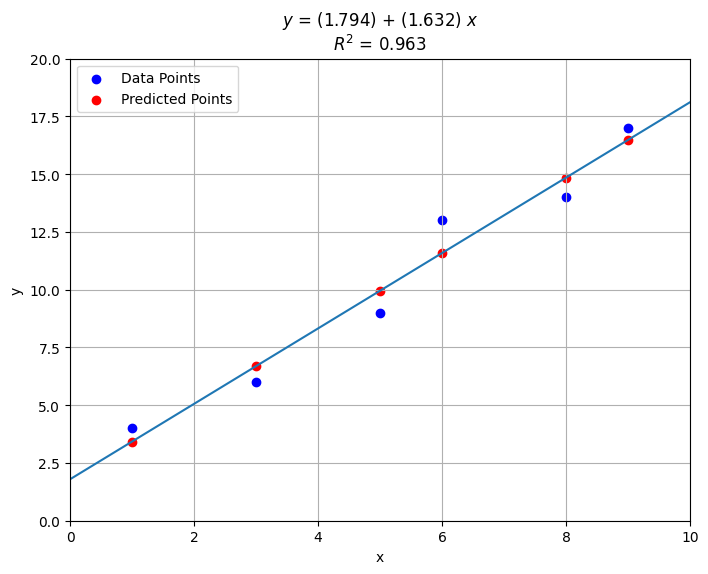

In [ ]:
model = MyLinearRegression(solver = "analytical")
model.fit(X, y)

check_model(model)
plot_linear_regression(model, X, y)

r_sq: 0.9620666151714126
model.intercept_:
1.97879935308771
model.coef_:
[1.59759916]
model.n_iter_: 2999
model.cost_history_:
[65.58333333 26.61848009 11.13178711  4.9760911   2.52884366] ... [0.6094136  0.60941359 0.60941359 0.60941358 0.60941358]
model.theta_history_:
[[0.         0.        ]
 [0.105      0.68333333]
 [0.17250556 1.11392778]
 [0.21637102 1.38519027]
 [0.24533049 1.55600667]] ... [[1.97876555 1.59760418]
 [1.97877234 1.59760317]
 [1.97877912 1.59760217]
 [1.97878588 1.59760116]
 [1.97879262 1.59760016]]


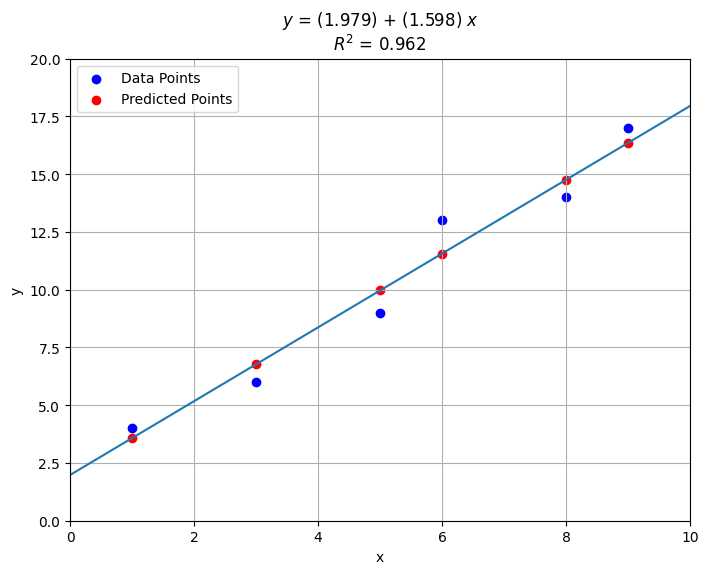

In [ ]:
reg_C = 1.0   # regularization parameter
model = MyLinearRegression(alpha = 0.01,
                            C = reg_C,
                            max_iter = 3000,
                            tol = 1e-10,
                            solver = "gradient descent")
model.fit(X, y)

check_model(model)
plot_linear_regression(model, X, y)

In [ ]:
# How to generate meshgrid and mesh surface
xline = np.linspace(1, 3, 3)
yline = np.linspace(4, 7, 4)

xs, ys = np.meshgrid(xline, yline)
xs_1d, ys_1d = xs.flatten(), ys.flatten()
print("xs = ", xs)
print("xs.shape =", xs.shape)
print("ys = ", ys)
print("ys.shape =", ys.shape)
print("xs_1d = ", xs_1d)
print("xs_1d.shape =", xs_1d.shape)
print("ys_1d = ", ys_1d)
print("ys_1d.shape =", ys_1d.shape)

xys = np.stack((xs_1d, ys_1d))
print("xys =\n", xys)
print("xys.shape =", xys.shape)

def get_z(xys):
  return xys[0] + xys[1]

zs = get_z(xys)

print("zs = ", zs)
print("zs.shape =", zs.shape)

xs =  [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
xs.shape = (4, 3)
ys =  [[4. 4. 4.]
 [5. 5. 5.]
 [6. 6. 6.]
 [7. 7. 7.]]
ys.shape = (4, 3)
xs_1d =  [1. 2. 3. 1. 2. 3. 1. 2. 3. 1. 2. 3.]
xs_1d.shape = (12,)
ys_1d =  [4. 4. 4. 5. 5. 5. 6. 6. 6. 7. 7. 7.]
ys_1d.shape = (12,)
xys =
 [[1. 2. 3. 1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [4. 4. 4. 5. 5. 5. 6. 6. 6. 7. 7. 7.]]
xys.shape = (2, 12)
zs =  [ 5.  6.  7.  6.  7.  8.  7.  8.  9.  8.  9. 10.]
zs.shape = (12,)


In [ ]:
import numpy as np
import plotly.graph_objects as go

def plot_cost_surface(model,
                      X, y, reg_C,
                      xlim = (-5.0, 15.0),  # theta_0
                      ylim = (0.0,   3.0),  # theta_1
                      zlim = (0.0, 100.0),  # cost
                      zaxis_dtick_count = 10,
                      title = "Gradient Descent Loss Surface",
                      xaxis_title = "theta_0",
                      yaxis_title = "theta_1",
                      zaxis_title = "loss",
                      points = None  # historical points for theta
                     ):

  X_augmented = get_augmented(X)

  if points != None:
    points_x = points[0]    # theta_0
    points_y = points[1]    # theta_1
    points_z = points[2]    # cost
    print("Final point: (theta_0 = %f, theta_1 = %f, loss = %f)" %
                        (points_x[-1], points_y[-1], points_z[-1]) )

    history_points = go.Scatter3d(x = points_x,
                                  y = points_y,
                                  z = points_z,
                                  mode = 'markers',
                                  marker = {"size": 2, "color": "red"},
                                  name = 'training'
                                 )

    final_point = go.Scatter3d(
                          x = [ points_x[-1] ],
                          y = [ points_y[-1] ],
                          z = [ points_z[-1] ],
                          mode = 'markers',
                          marker = {"size": 3, "color": "blue"},
                          name = 'final'
                        )

  xlim_min, xlim_max = xlim
  ylim_min, ylim_max = ylim

  xs_num, ys_num = 50, 50
  xline = np.linspace(xlim_min, xlim_max, xs_num)
  yline = np.linspace(ylim_min, ylim_max, ys_num)
  xs, ys = np.meshgrid(xline, yline)
  xys = np.stack((xs.flatten(), ys.flatten()))

  zs = lr_cost_func(X_augmented, y, xys, reg_C).reshape(xs_num, ys_num)

  surface = go.Surface(x = xs, y = ys, z = zs,
                       opacity = 0.8, colorscale = 'viridis',
                       showscale = False,
                       name = 'Loss Surface'
                      )

  fig = go.Figure(data = [surface, history_points, final_point])

  fig.update_layout(scene = {"xaxis_title": xaxis_title,
                             "yaxis_title": yaxis_title,
                             "zaxis_title": zaxis_title,
                             "zaxis_range": zlim,
                             "zaxis_dtick": (zlim[1]-zlim[0])/zaxis_dtick_count
                            },
                    width = 800,
                    height = 600,
                    scene_camera = { "eye": {"x": -1, "y": -1.5, "z": 1.5} },
                    title = {"text": title,
                            "font": {"size": 30},
                            "x": 0.5,
                            "xanchor": "center"
                            }
                  )

  fig.show()

In [ ]:
plot_cost_surface(model,
                  X, y, reg_C,
                  xlim = (-50.0,  50.0),  # theta_0
                  ylim = ( -6.0,  10.0),  # theta_1
                  zlim = (  0.0, 200.0),  # cost
                  points = ( model.theta_history_[:, 0],
                             model.theta_history_[:, 1],
                             model.cost_history_.reshape(-1) )
                  )

Final point: (theta_0 = 1.978793, theta_1 = 1.597600, loss = 0.609414)


In [ ]:
plot_cost_surface(model,
                  X, y, reg_C,
                  xlim = (-0.5,   4.0),  # theta_0
                  ylim = (-1.0,   4.0),  # theta_1
                  zlim = ( 0.0, 200.0),  # cost
                  points = ( model.theta_history_[:, 0],
                             model.theta_history_[:, 1],
                             model.cost_history_.reshape(-1) )
                  )

Final point: (theta_0 = 1.978793, theta_1 = 1.597600, loss = 0.609414)


In [ ]:
plot_cost_surface(model,
                  X, y, reg_C,
                  xlim = ( 0.0, 2.8),  # theta_0
                  ylim = ( 0.0, 2.0),  # theta_1
                  zlim = ( 0.3, 100),  # cost
                  points = ( model.theta_history_[:, 0],
                             model.theta_history_[:, 1],
                             model.cost_history_.reshape(-1) )
                  )

Final point: (theta_0 = 1.978793, theta_1 = 1.597600, loss = 0.609414)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cost_contour(model,
                      X, y, reg_C,
                      xlim = (-5.0, 15.0),  # theta_0
                      ylim = (0.0,   3.0),  # theta_1
                      title = "Gradient Descent Loss Contour",
                      xaxis_title = "theta_0",
                      yaxis_title = "theta_1",
                      points = None  # historical points for theta
                     ):

  X_augmented = get_augmented(X)

  xlim_min, xlim_max = xlim
  ylim_min, ylim_max = ylim

  xs_num, ys_num = 50, 50
  xline = np.linspace(xlim_min, xlim_max, xs_num)
  yline = np.linspace(ylim_min, ylim_max, ys_num)
  xs, ys = np.meshgrid(xline, yline)
  xys = np.stack((xs.flatten(), ys.flatten()))

  zs = lr_cost_func(X_augmented, y, xys, reg_C).reshape(xs_num, ys_num)
  print("Min z = ", np.min(zs))
  print("Max z = ", np.max(zs))

  plt.contourf(xs, ys, zs, cmap='viridis', levels=30)
  plt.colorbar()

  if points != None:
    points_x = points[0]    # theta_0
    points_y = points[1]    # theta_1
    points_z = points[2]    # cost
    print("Final point: (theta_0 = %f, theta_1 = %f, loss = %f)" %
                        (points_x[-1], points_y[-1], points_z[-1]) )

  plt.scatter(points_x, points_y, color = "red", label = "training", s = 2)
  plt.scatter(points_x[-1], points_y[-1], color = "blue", label = "final", s = 3)

  plt.xlabel(xaxis_title)
  plt.ylabel(yaxis_title)
  plt.title(title)

  plt.show()

Min z =  0.8280924614743844
Max z =  4582.249999999999
Final point: (theta_0 = 1.978793, theta_1 = 1.597600, loss = 0.609414)


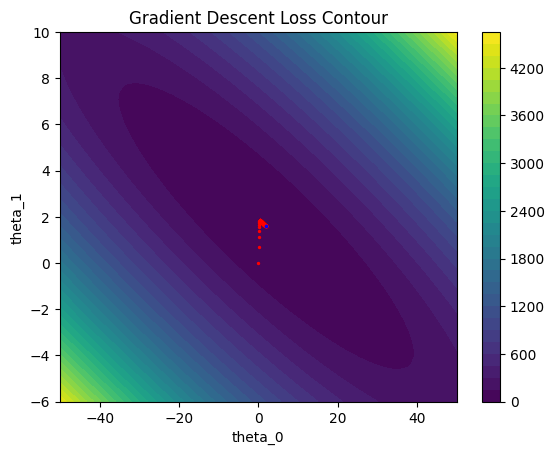

In [ ]:
plot_cost_contour(model,
                  X, y, reg_C,
                  xlim = (-50.0,  50.0),  # theta_0
                  ylim = ( -6.0,  10.0),  # theta_1
                  # xlim = (-0.5,   4.0),  # theta_0
                  # ylim = (-1.0,   4.0),  # theta_1
                  # xlim = ( 0.0, 2.8),  # theta_0
                  # ylim = ( 0.0, 2.0),  # theta_1
                  points = ( model.theta_history_[:, 0],
                             model.theta_history_[:, 1],
                             model.cost_history_.reshape(-1) )
                  )

Min z =  0.6179890323476326
Max z =  160.04166666666666
Final point: (theta_0 = 1.978793, theta_1 = 1.597600, loss = 0.609414)


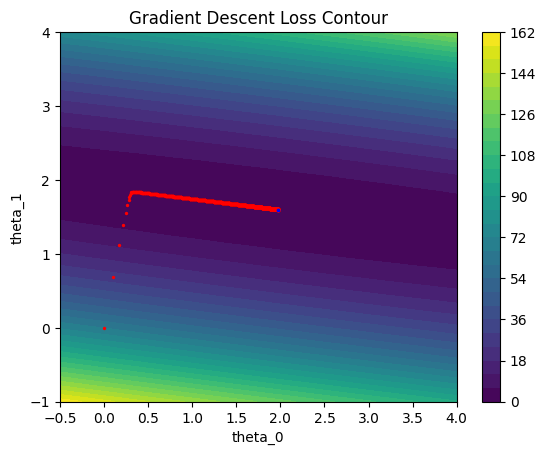

In [ ]:
plot_cost_contour(model,
                  X, y, reg_C,
                  # xlim = (-50.0,  50.0),  # theta_0
                  # ylim = ( -6.0,  10.0),  # theta_1
                  xlim = (-0.5,   4.0),  # theta_0
                  ylim = (-1.0,   4.0),  # theta_1
                  # xlim = ( 0.0, 2.8),  # theta_0
                  # ylim = ( 0.0, 2.0),  # theta_1
                  points = ( model.theta_history_[:, 0],
                             model.theta_history_[:, 1],
                             model.cost_history_.reshape(-1) )
                  )

Min z =  0.609572400388727
Max z =  65.58333333333333
Final point: (theta_0 = 1.978793, theta_1 = 1.597600, loss = 0.609414)


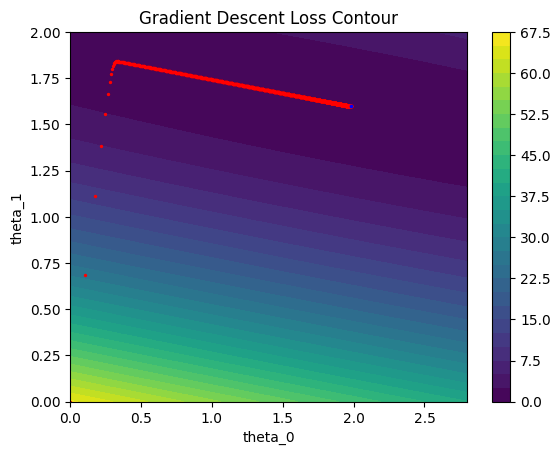

In [ ]:
plot_cost_contour(model,
                  X, y, reg_C,
                  # xlim = (-50.0,  50.0),  # theta_0
                  # ylim = ( -6.0,  10.0),  # theta_1
                  # xlim = (-0.5,   4.0),  # theta_0
                  # ylim = (-1.0,   4.0),  # theta_1
                  xlim = ( 0.0, 2.8),  # theta_0
                  ylim = ( 0.0, 2.0),  # theta_1
                  points = ( model.theta_history_[:, 0],
                             model.theta_history_[:, 1],
                             model.cost_history_.reshape(-1) )
                  )

# <font color='lightblue'>Learning Rate</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss_iterations(cost_histories, labels,
                         title = "Gradient Descent Loss",
                         iter_start = 0, iter_end = -1, iter_step = 1
                         ):

  plt.figure(figsize=(8, 6))

  itr_min = np.min([len(hist) for hist in cost_histories])
  if iter_end < 0:
    iter_end = itr_min + iter_end

  cost_min = 0
  cost_max = np.max([np.max(hist[iter_start : iter_end + 1]) for hist in cost_histories])

  xs = range(iter_start, iter_end + 1)

  colors = ["blue", "magenta", "cyan", "red", "green", "yellow"]
  for i, cost_history in enumerate(cost_histories):
    ys = cost_history[iter_start : iter_end + 1]
    plt.scatter(xs, ys, color = colors[i], label = labels[i], s = 5)

  plt.xlim(iter_start - 0.5, iter_end + 0.5)
  plt.ylim(cost_min - 0.5, cost_max + 0.5)
  plt.xlabel('iteration')
  plt.ylabel('loss')
  plt.title(title)
  plt.grid(True)

  plt.legend()
  plt.show()

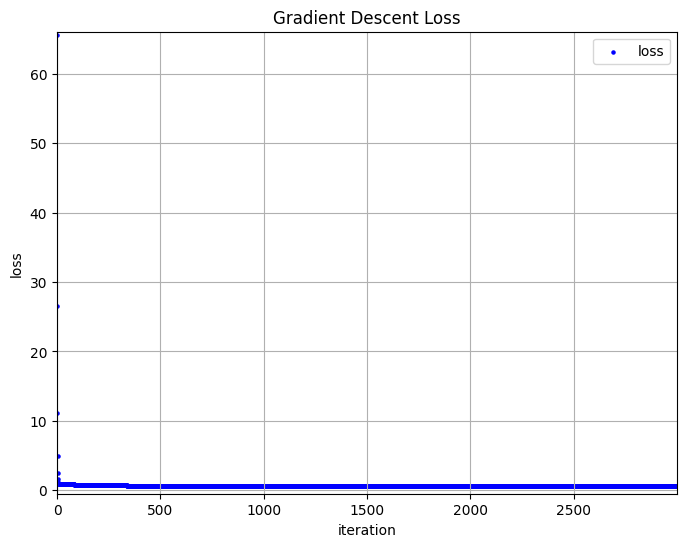

In [ ]:
plot_loss_iterations([model.cost_history_.reshape(-1)], ["loss"],
                      iter_start = 0, iter_end = -1, iter_step = 1
                     )

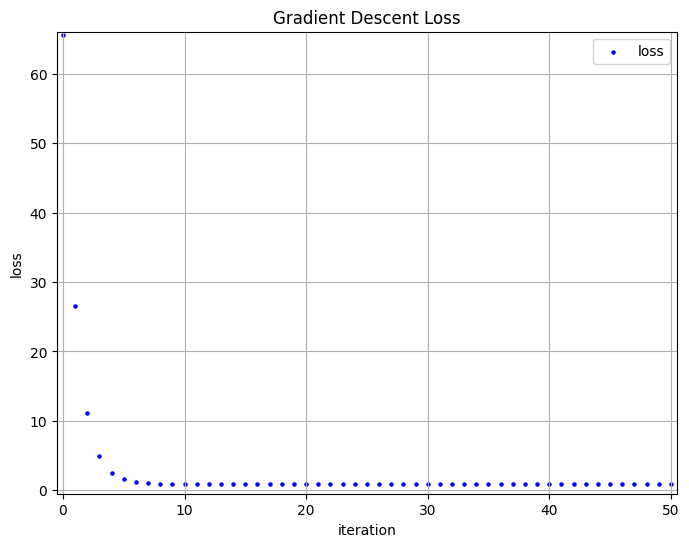

In [ ]:
plot_loss_iterations([model.cost_history_.reshape(-1)], ["loss"],
                      iter_start = 0, iter_end = 50, iter_step = 1
                     )

r_sq: 0.9422993304753841
model.intercept_:
0.37821287366537826
model.coef_:
[1.83497845]
model.n_iter_: 299
model.cost_history_:
[65.58333333 60.8919598  56.540934   52.50556384 48.76294866] ... [0.88462284 0.88450784 0.88439289 0.88427799 0.88416313]
model.theta_history_:
[[0.         0.        ]
 [0.0105     0.06833333]
 [0.02062506 0.13413928]
 [0.03038902 0.19751124]
 [0.03980524 0.25853918]] ... [[0.37653557 1.83522237]
 [0.37687118 1.83517364]
 [0.37720672 1.83512488]
 [0.37754218 1.83507609]
 [0.37787756 1.83502728]]



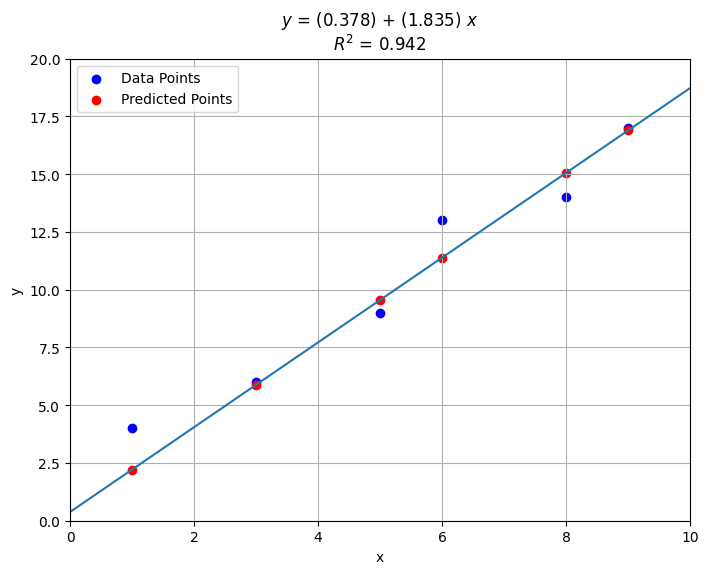

r_sq: 0.9571559870295075
model.intercept_:
1.0703039177315041
model.coef_:
[1.73234934]
model.n_iter_: 299
model.cost_history_:
[65.58333333 26.61848009 11.13178711  4.9760911   2.52884366] ... [0.70003907 0.69966074 0.69928399 0.69890882 0.69853521]
model.theta_history_:
[[0.         0.        ]
 [0.105      0.68333333]
 [0.17250556 1.11392778]
 [0.21637102 1.38519027]
 [0.24533049 1.55600667]] ... [[1.06071894 1.73377101]
 [1.06264396 1.73348548]
 [1.06456496 1.73320055]
 [1.06648195 1.73291622]
 [1.06839493 1.73263248]]



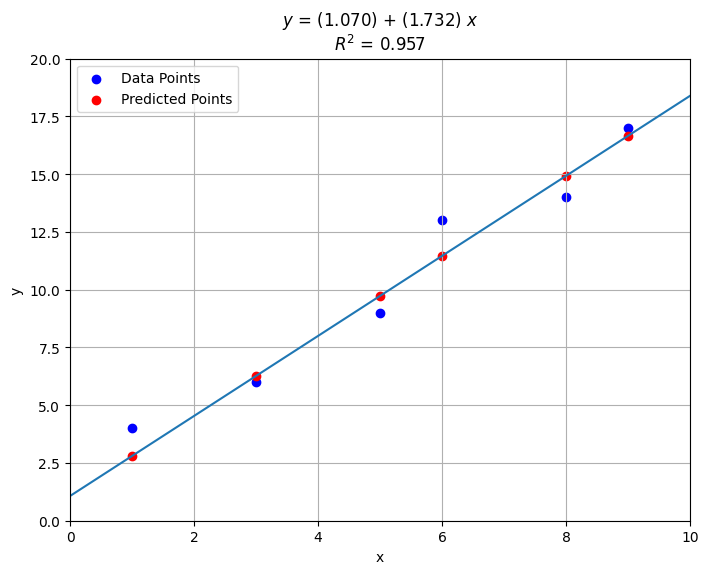

r_sq: 0.9622769749044052
model.intercept_:
1.9088929602129359
model.coef_:
[1.60796784]
model.n_iter_: 299
model.cost_history_:
[65.58333333 47.4008912  34.32765639 24.92751989 18.16804698] ... [0.61004657 0.61003339 0.61002048 0.61000785 0.60999547]
model.theta_history_:
[[0.         0.        ]
 [0.525      3.41666667]
 [0.11263889 0.51486111]
 [0.49471065 2.97045023]
 [0.20285505 0.88362989]] ... [[1.90495063 1.60855258]
 [1.90575574 1.60843316]
 [1.90655245 1.60831499]
 [1.90734083 1.60819806]
 [1.90812097 1.60808235]]



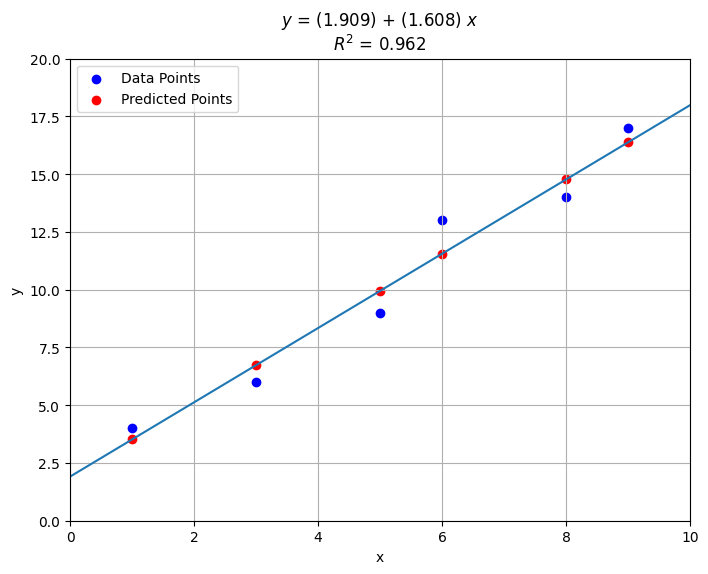

r_sq: 0.48059764649315073
model.intercept_:
1.8495432538251548
model.coef_:
[1.09501228]
model.n_iter_: 299
model.cost_history_:
[65.58333333 65.02361283 64.46877385 63.91877249 63.37356526] ... [5.74792603 5.70399676 5.66044311 5.61726188 5.57444988]
model.theta_history_:
[[0.         0.        ]
 [0.567      3.69      ]
 [0.040662   0.010134  ]
 [0.60254766 3.66863164]
 [0.08044417 0.02026032]] ... [[1.99931831 2.1276331 ]
 [1.84559679 1.08656198]
 [2.00000471 2.12297456]
 [1.84758779 1.09080389]
 [2.00066653 2.11835861]]



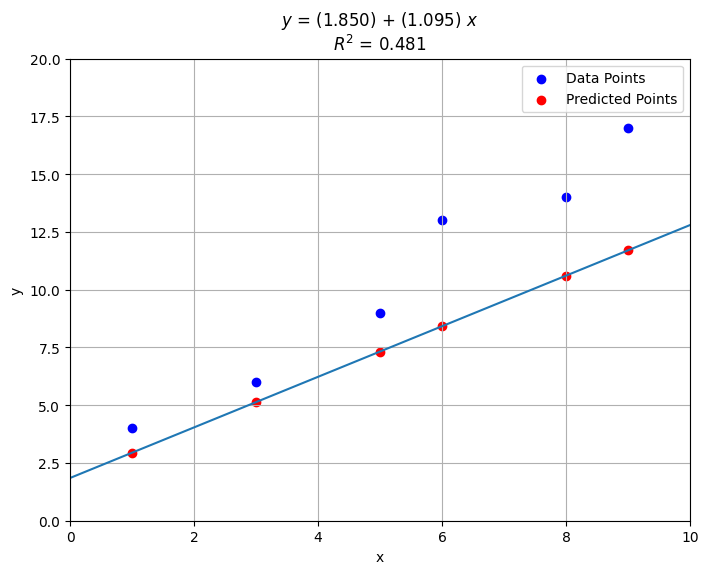

r_sq: -3.404233060401868
model.intercept_:
1.6955240475477311
model.coef_:
[0.05413242]
model.n_iter_: 299
model.cost_history_:
[65.58333333 65.50039245 65.41769808 65.3352466  65.25303443] ... [46.32906505 46.27536202 46.22172223 46.16814562 46.11463211]
model.theta_history_:
[[ 0.00000000e+00  0.00000000e+00]
 [ 5.68050000e-01  3.69683333e+00]
 [ 3.87088506e-02 -3.52040722e-03]
 [ 6.05680457e-01  3.68903222e+00]
 [ 7.65543807e-02 -6.91537314e-03]] ... [[2.15310373 3.16189345]
 [1.69235916 0.05087116]
 [2.1541745  3.1598671 ]
 [1.69395667 0.05250065]
 [2.15521543 3.15784737]]



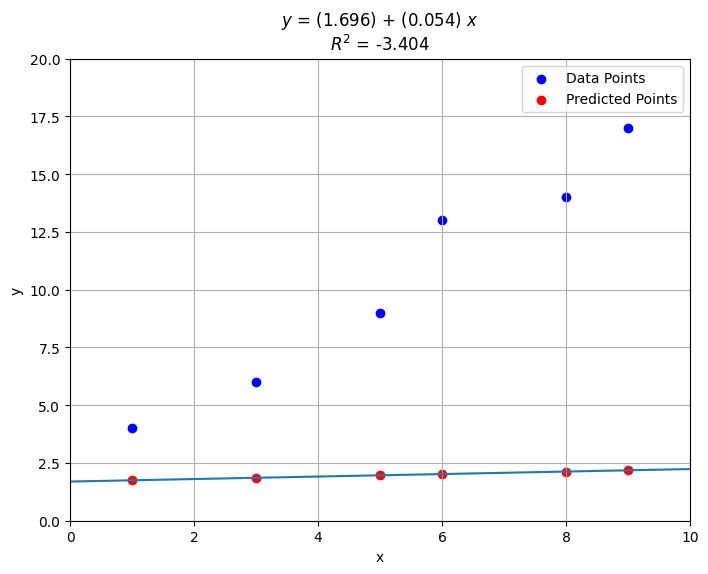

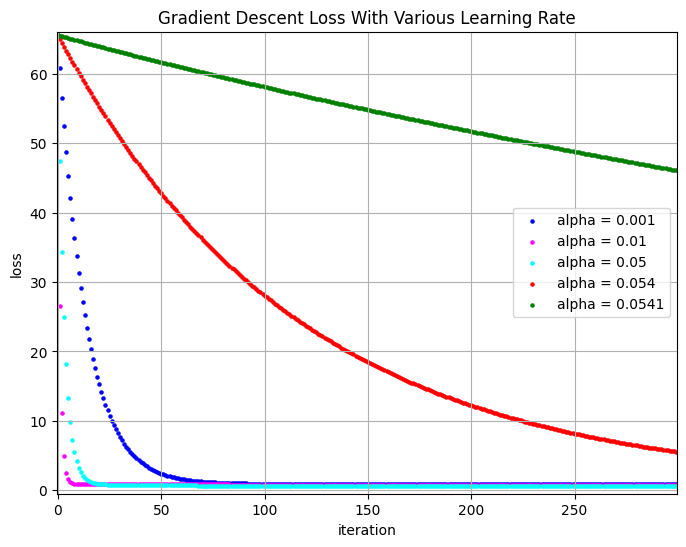

In [27]:
X = np.array([1, 3, 5, 6, 8, 9]).reshape((-1, 1))
y = np.array([4, 6, 9, 13, 14, 17]).reshape((-1, 1))

reg_C = 1.0   # regularization parameter

alphas = [0.001, 0.01, 0.05, 0.054, 0.0541]

cost_histories = []
for alpha in alphas:
  model = MyLinearRegression(alpha = alpha, C = reg_C, max_iter = 300,
                            tol = 1e-10, solver = "gradient descent")
  model.fit(X, y)
  cost_history = model.cost_history_.reshape(-1)
  cost_histories.append(cost_history)

  check_model(model)
  print()
  plot_linear_regression(model, X, y)

print()
plot_loss_iterations(cost_histories, [f"alpha = {alpha}" for alpha in alphas],
                     iter_start = 0, iter_end = -1, iter_step = 1,
                     title = "Gradient Descent Loss With Various Learning Rate"
                     )

r_sq: -38.78433425009178
model.intercept_:
1.2296305114827746
model.coef_:
[-3.08941118]
model.n_iter_: 299
model.cost_history_:
[65.58333333 65.97893848 66.3772084  66.77815514 67.18179094] ... [404.15267559 406.66529546 409.19356021 411.73756725 414.29741457]
model.theta_history_:
[[ 0.          0.        ]
 [ 0.5691      3.70366667]
 [ 0.0367482  -0.01722536]
 [ 0.60883573  3.70958435]
 [ 0.07261965 -0.034394  ]] ... [[ 2.60832522  6.22847358]
 [ 1.2356099  -3.03110116]
 [ 2.61393015  6.2570574 ]
 [ 1.23264841 -3.06016849]
 [ 2.61953157  6.28582489]]



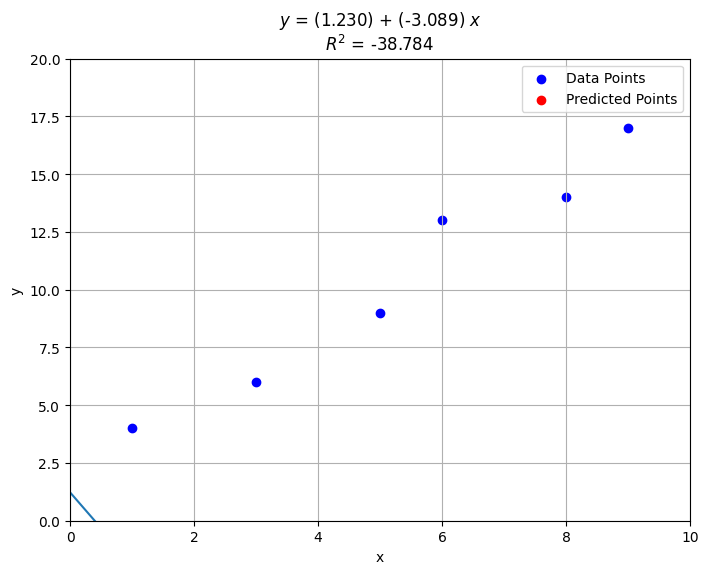

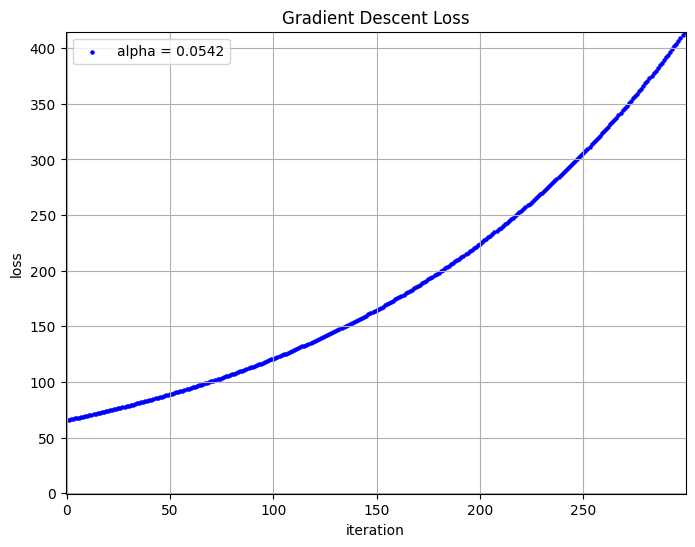

In [ ]:
alpha = 0.0542
model = MyLinearRegression(alpha = alpha, C = reg_C, max_iter = 300,
                            tol = 1e-10, solver = "gradient descent")
model.fit(X, y)
cost_history = model.cost_history_.reshape(-1)
check_model(model)
print()
plot_linear_regression(model, X, y)

print()
plot_loss_iterations([cost_history], [f"alpha = {alpha}"],
                     iter_start = 0, iter_end = -1, iter_step = 1
                     )

# <font color='lightblue'>Effect of Regularizations</font>

r_sq: 0.7497501637276454
model.intercept_:
2.4565084139338254
model.coef_:
[1.7990472]
model.n_iter_: 2999
model.cost_history_:
[90.25       37.02320062 16.34078002  8.30382589  5.18040401] ... [2.86190756 2.86190736 2.86190716 2.86190696 2.86190676]
model.theta_history_:
[[0.         0.        ]
 [0.12555556 0.8       ]
 [0.20496667 1.2985016 ]
 [0.25561219 1.60906554]
 [0.28832517 1.80247947]] ... [[2.45628781 1.79908096]
 [2.45633206 1.79907419]
 [2.45637624 1.79906743]
 [2.45642036 1.79906068]
 [2.45646442 1.79905394]]


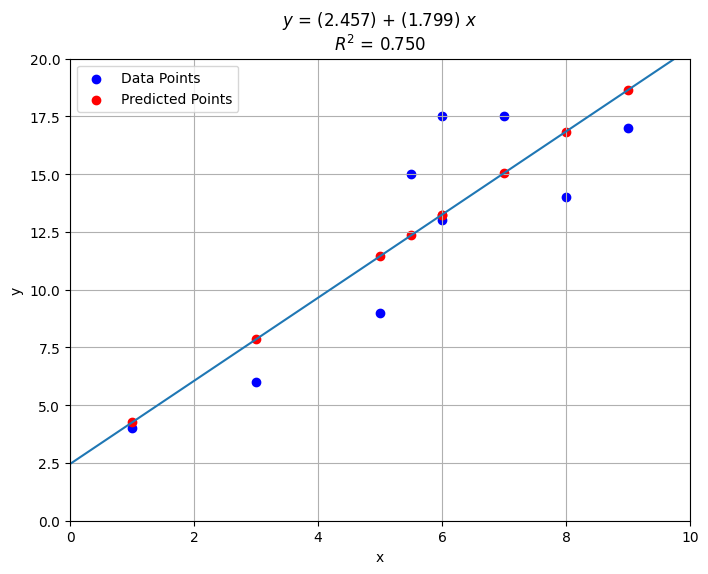

In [ ]:
# X = np.array([1, 3, 5, 6, 8, 9]).reshape((-1, 1))
# y = np.array([4, 6, 9, 13, 14, 17]).reshape((-1, 1))
X = np.array([1, 3, 5, 6, 8, 9, 7, 6.0, 5.5]).reshape((-1, 1))
y = np.array([4, 6, 9, 13, 14, 17, 17.5, 17.5, 15.0]).reshape((-1, 1))

reg_C = 100   # regularization parameter
model = MyLinearRegression(alpha = 0.01,
                            C = reg_C,
                            max_iter = 3000,
                            tol = 1e-10,
                            solver = "gradient descent")
model.fit(X, y)

check_model(model)
plot_linear_regression(model, X, y)

r_sq: 0.24734468168733958
model.intercept_:
10.748577844371125
model.coef_:
[0.50445826]
model.n_iter_: 2999
model.cost_history_:
[102.25        51.75851142  35.38233352  30.02002951  28.21379674] ... [9.99108838 9.99108837 9.99108837 9.99108837 9.99108837]
model.theta_history_:
[[0.         0.        ]
 [0.13454545 0.79090909]
 [0.22532397 1.23846529]
 [0.29118941 1.49094107]
 [0.34285431 1.63258187]] ... [[10.74856588  0.50445979]
 [10.74856829  0.50445948]
 [10.74857069  0.50445917]
 [10.74857308  0.50445887]
 [10.74857547  0.50445857]]


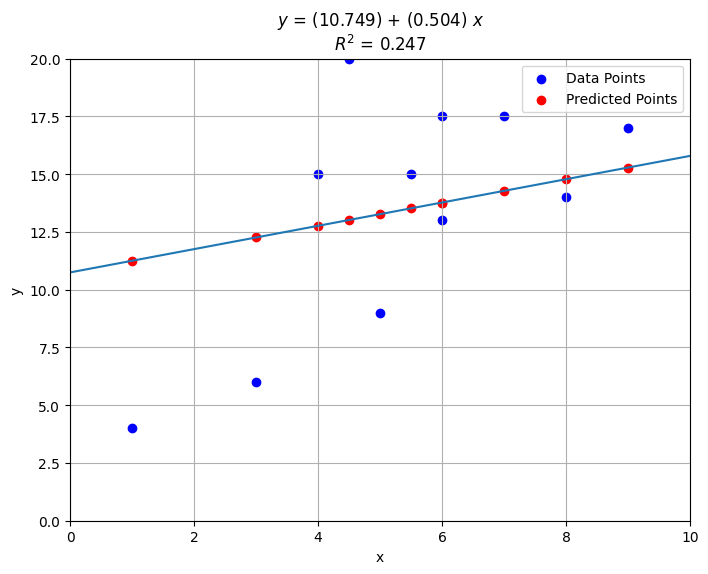

In [ ]:
# X = np.array([1, 3, 5, 6, 8, 9]).reshape((-1, 1))
# y = np.array([4, 6, 9, 13, 14, 17]).reshape((-1, 1))
X = np.array([1, 3, 5, 6, 8, 9, 7, 6.0, 5.5, 4.0, 4.5]).reshape((-1, 1))
y = np.array([4, 6, 9, 13, 14, 17, 17.5, 17.5, 15.0, 15, 20.0]).reshape((-1, 1))

reg_C = 0.01   # regularization parameter
model = MyLinearRegression(alpha = 0.01,
                            C = reg_C,
                            max_iter = 3000,
                            tol = 1e-10,
                            solver = "gradient descent")
model.fit(X, y)

check_model(model)
plot_linear_regression(model, X, y)

r_sq: 0.0417316590489617
model.intercept_:
13.065649309640605
model.coef_:
[0.07248756]
model.n_iter_: 1496
model.cost_history_:
[102.25        77.3486692   74.92470227  73.86967311  72.91104926] ... [11.48661212 11.48661212 11.48661212 11.48661212 11.48661212]
model.theta_history_:
[[0.         0.        ]
 [0.13454545 0.79090909]
 [0.22532397 0.59135785]
 [0.3258979  0.63501606]
 [0.42312442 0.61900475]] ... [[13.06564526  0.07248774]
 [13.06564629  0.07248769]
 [13.0656473   0.07248765]
 [13.06564831  0.0724876 ]
 [13.06564931  0.07248756]]


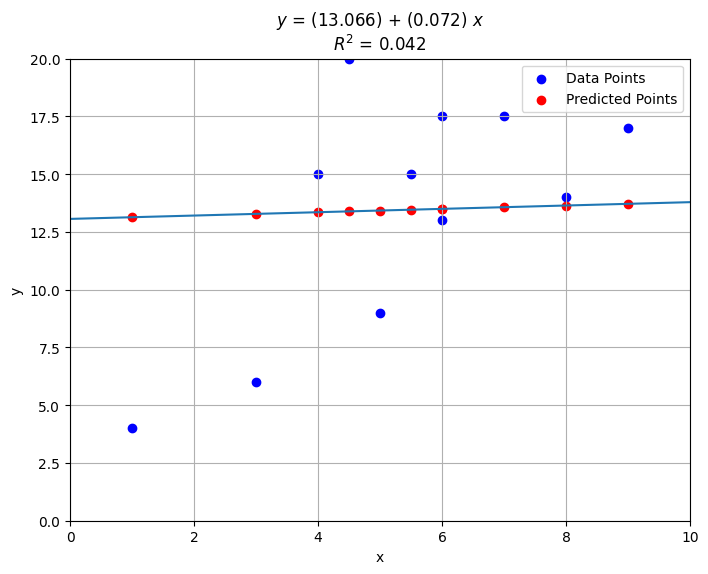

In [ ]:
# X = np.array([1, 3, 5, 6, 8, 9]).reshape((-1, 1))
# y = np.array([4, 6, 9, 13, 14, 17]).reshape((-1, 1))
X = np.array([1, 3, 5, 6, 8, 9, 7, 6.0, 5.5, 4.0, 4.5]).reshape((-1, 1))
y = np.array([4, 6, 9, 13, 14, 17, 17.5, 17.5, 15.0, 15, 20.0]).reshape((-1, 1))

reg_C = 0.001   # regularization parameter
model = MyLinearRegression(alpha = 0.01,
                            C = reg_C,
                            max_iter = 3000,
                            tol = 1e-10,
                            solver = "gradient descent")
model.fit(X, y)

check_model(model)
plot_linear_regression(model, X, y)

# <font color='lightblue'>TO DO</font>

## <font color='lightblue'>1. Try different C, tolerance values etc.</font>
## <font color='lightblue'>2. Try add extra data points</font>



## END.